tensor(4.0324) tensor(4.0324)


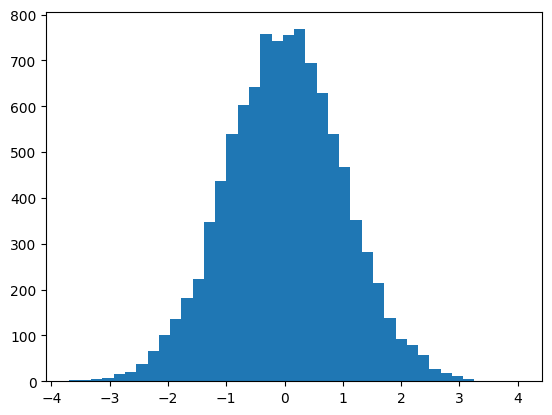

In [1]:
from matplotlib import pyplot as plt
import torch

# torch.randn generates a tensor of random numbers from N(0, 1)

nums = torch.randn(10000)

print(nums.max(), nums.max())

plt.hist(nums, bins=40)
plt.show()

In [2]:
from PIL import Image
from torchvision import transforms

resolution = 128

normalize = transforms.Compose([
    transforms.Resize((resolution, resolution)),    
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

denormalize = transforms.Compose([
    transforms.Normalize([-1], [2]),
    transforms.Lambda(lambda x: x.clamp(0, 1)),
    transforms.ToPILImage()
])

img_path = 'data/images/collins.png'
image_pil = Image.open(img_path)
image = normalize(image_pil)

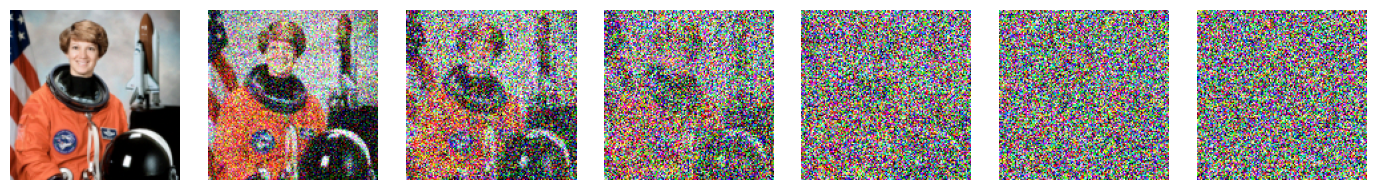

In [3]:
from diffusers import DDPMScheduler, DDIMScheduler

from text3d2video.ipython_utils import display_ims

scheduler = DDIMScheduler()

scheduler.set_timesteps(7)

noisy_ims = []
for t in scheduler.timesteps:
    noise = torch.randn_like(image)
    noisy = scheduler.add_noise(image, noise, t)
    noisy_ims.append(denormalize(noisy))

noisy_ims.reverse()

display_ims(noisy_ims)

In [4]:
image_values = image.flatten()
image_values

tensor([-0.9922, -1.0000, -0.9922,  ...,  0.1294, -0.5451, -0.9922])

In [5]:
data = image_values

scheduler.set_timesteps(100)

noises = []
for t in scheduler.timesteps:
    noise = torch.randn_like(data)
    noisy = scheduler.add_noise(data, noise, t)
    noises.append(noisy)

noises = torch.stack(noises)

(array([4421., 2066., 1420., 1035.,  837.,  890.,  955.,  966., 1037.,
        1049., 1051., 1175., 1069., 1002., 1020., 1046., 1063., 1116.,
         973.,  891.,  760.,  856.,  938.,  973., 1167., 1403., 1793.,
        2039., 2090., 2211., 2160., 1956., 1497.,  726.,  646.,  708.,
         657.,  573.,  647.,  270.]),
 array([-1.03285074, -0.98166168, -0.93047267, -0.87928367, -0.8280946 ,
        -0.77690554, -0.72571653, -0.67452753, -0.62333846, -0.5721494 ,
        -0.52096039, -0.46977136, -0.41858232, -0.36739329, -0.31620425,
        -0.26501521, -0.21382618, -0.16263714, -0.11144811, -0.06025907,
        -0.00907004,  0.042119  ,  0.09330803,  0.14449707,  0.1956861 ,
         0.24687514,  0.29806417,  0.34925321,  0.40044224,  0.45163128,
         0.50282031,  0.55400932,  0.60519838,  0.65638745,  0.70757645,
         0.75876546,  0.80995452,  0.86114359,  0.91233259,  0.9635216 ,
         1.01471066]),
 <BarContainer object of 40 artists>)

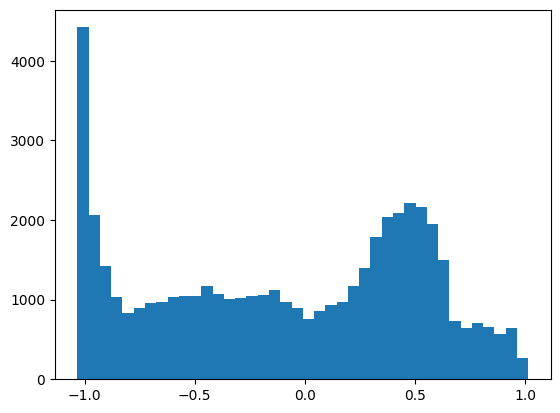

In [31]:
# plt.plot(noises.numpy())

# N = 30
# plt.plot(noises[:, 0:N])

pixels_t = noises[99]
plt.hist(pixels_t.numpy(), bins=40)